# Implementing the Gradient Descent Algorithm

In this lab, we'll implement the basic functions of the Gradient Descent algorithm to find the boundary in a small dataset. First, we'll start with some functions that will help us plot and visualize the data.

In [78]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

#Some helper functions for plotting and drawing lines

# 这里是np.where的使用
# x = np.arange(6).reshape(2,3)
# x
# array([[0, 1, 2],
#        [3, 4, 5]])
# np.argwhere(x>1)
# Output:
# array([[0, 2],
#        [1, 0],
#        [1, 1],
#        [1, 2]])

def plot_points(X, y):
    # admitted = X[np.argwhere(y==1)]
    # rejected = X[np.argwhere(y==0)]
    # 我用实际行动该证明了，这样做跟他那样做是完全等价的，而且我这样比他更加的方便！  很棒了王果
    # 这里事实上就是用numpy 做一个广播，y == 1会广播到所有维度，然后利用X[]的索引切片挑选出admitted 的点
    admitted = X[y==1]
    rejected = X[y==0]
    
    plt.scatter(admitted[:,0],admitted[:,1], s = 10, color = 'blue', edgecolor = 'k')
    plt.scatter(rejected[:,0],rejected[:,1], s = 10, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    # 限制x，y的距离
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)


    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

## Reading and plotting the data

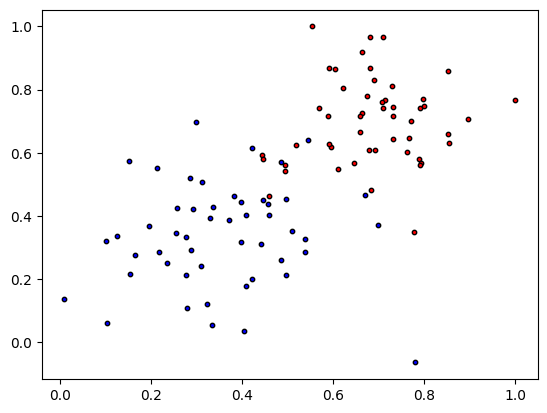

In [79]:
data = pd.read_csv('data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

## TODO: Implementing the basic functions
Here is your turn to shine. Implement the following formulas, as explained in the text.
- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Output (prediction) formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Error function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- The function that updates the weights

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [80]:
# Implement the following functions

# Activation (sigmoid) function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# Output (prediction) formula
def output_formula(features, weights, bias):
    return sigmoid(np.dot(features,weights) + bias)

# Error (log-loss) formula
def error_formula(y, output):
    # 这里加一个eps 防止溢出
    eps = 1e-6
    return -y * np.log(output + eps) -(1-y) * np.log(1 - output + eps)

# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    y_pred = output_formula(x ,weights , bias)
    dy = y - y_pred
    weights = weights + learnrate * dy * x
    bias = bias + learnrate *dy
    return weights,bias

## Training function
This function will help us iterate the gradient descent algorithm through all the data, for a number of epochs. It will also plot the data, and some of the boundary lines obtained as we run the algorithm.

In [81]:
# set the random seed
np.random.seed(44)

epochs = 100
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines=False):   
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            weights, bias = update_weights(x, y, weights, bias, learnrate)
            # Printing out the log-loss error on the training set
            out = output_formula(features, weights, bias)
            loss = np.mean(error_formula(targets, out))
            errors.append(loss)
            if e % (epochs / 10) == 0:
                print("\n========== Epoch", e,"==========")
                if last_loss and last_loss < loss:
                    print("Train loss: ", loss, "  WARNING - Loss Increasing")
                else:
                    print("Train loss: ", loss)
                last_loss = loss
                
                # Converting the output (float) to boolean as it is a binary classification
                # e.g. 0.95 --> True (= 1), 0.31 --> False (= 0)
                predictions = out > 0.5
                
                accuracy = np.mean(predictions == targets)
                print("Accuracy: ", accuracy)
            if graph_lines and e % (epochs / 100) == 0:
                display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

## Time to train the algorithm!
When we run the function, we'll obtain the following:
- 10 updates with the current training loss and accuracy
- A plot of the data and some of the boundary lines obtained. The final one is in black. Notice how the lines get closer and closer to the best fit, as we go through more epochs.
- A plot of the error function. Notice how it decreases as we go through more epochs.


========== Epoch 0 ==========
Train loss:  0.7424629113858174
Accuracy:  0.4

========== Epoch 0 ==========
Train loss:  0.7430402327438541   WARNING - Loss Increasing
Accuracy:  0.4

========== Epoch 0 ==========
Train loss:  0.7436736972048118   WARNING - Loss Increasing
Accuracy:  0.42

========== Epoch 0 ==========
Train loss:  0.744303881721969   WARNING - Loss Increasing
Accuracy:  0.43

========== Epoch 0 ==========
Train loss:  0.7450827598674152   WARNING - Loss Increasing
Accuracy:  0.43

========== Epoch 0 ==========
Train loss:  0.7456202416317765   WARNING - Loss Increasing
Accuracy:  0.44

========== Epoch 0 ==========
Train loss:  0.7462383701984643   WARNING - Loss Increasing
Accuracy:  0.44

========== Epoch 0 ==========
Train loss:  0.7469789455380123   WARNING - Loss Increasing
Accuracy:  0.44

========== Epoch 0 ==========
Train loss:  0.747676926587406   WARNING - Loss Increasing
Accuracy:  0.46

========== Epoch 0 ==========
Train loss:  0.7482636302980122   WARN

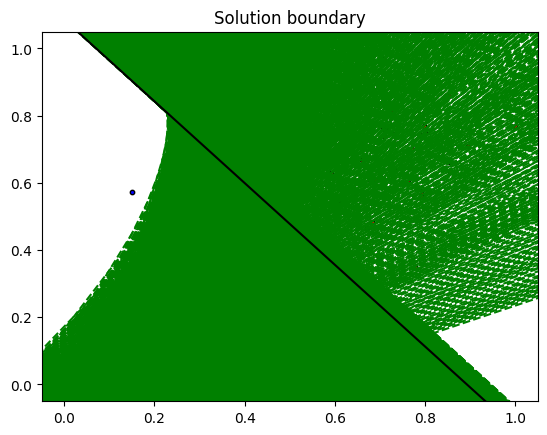

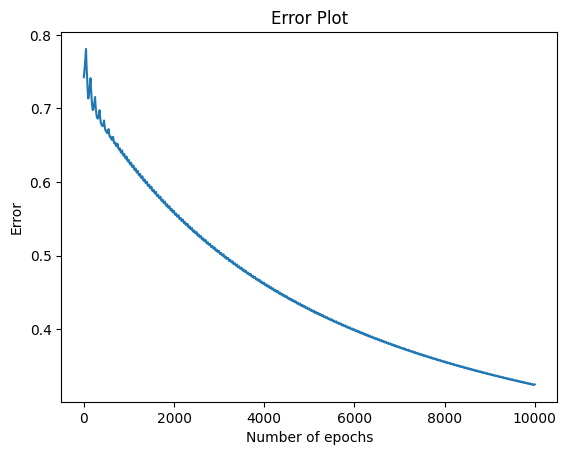

In [82]:
train(X, y, epochs, learnrate, True)